In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
train_log=pd.read_csv("C:/Users/david/OneDrive/Desktop/Train Dataset .csv")
test_log=pd.read_csv("C:/Users/david/OneDrive/Desktop/Test Dataset.csv")
Sub_log=pd.read_csv("C:/Users/david/OneDrive/Desktop/Sample Submission.csv")


In [3]:
train_log

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


In [4]:
train_l=train_log.copy()

In [5]:
test_l=test_log.copy()

In [6]:
train_l

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


In [7]:
train_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [8]:
test_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [9]:
train_l.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
test_l.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,14939.832036,53.064516,0.488691,1.504264,146.384872,344.027809,0.497219,1.021135,135.993326,0.484613,3.142714,1.011494,2.032258,1.473489
std,2888.940621,14.350978,0.499965,1.112747,30.640580,127.265038,0.500085,0.811590,38.419913,0.499856,1.810003,0.814976,1.397353,1.120744
min,10000.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12455.000000,41.000000,0.000000,1.000000,121.000000,233.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000
50%,14854.000000,53.000000,0.000000,1.000000,147.000000,344.000000,0.000000,1.000000,136.000000,0.000000,3.200000,1.000000,2.000000,1.000000
75%,17465.000000,66.000000,1.000000,3.000000,172.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000
max,19999.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [11]:
## checking for missing values

train_l.isnull()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
test_l.isnull()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2693,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2694,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2695,False,False,False,False,False,False,False,False,False,False,False,False,False,False


(array([1362.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5941.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

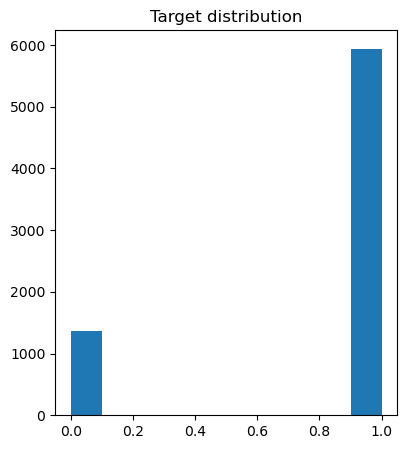

In [13]:
## target distribution
sns.style=('darkgrid')
plt.figure(figsize=[15,5])


plt.subplot(1,3,2)
plt.title("Target distribution")
plt.hist(data=train_l, x = "target")

<Axes: xlabel='Sex', ylabel='cp'>

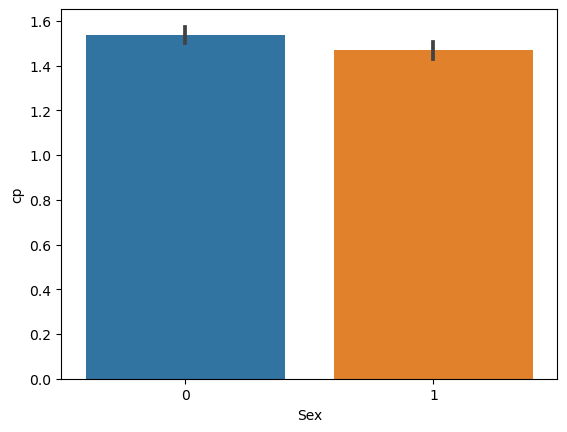

In [14]:
sns.barplot(x="Sex", y="cp", data=train_l)

<Axes: ylabel='Age'>

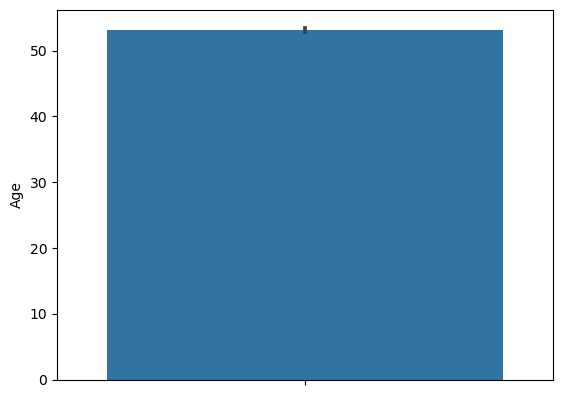

In [15]:
sns.barplot(y="Age", data=train_l)

In [16]:
## correlation matrix
corr=train_l.corr()

<Axes: >

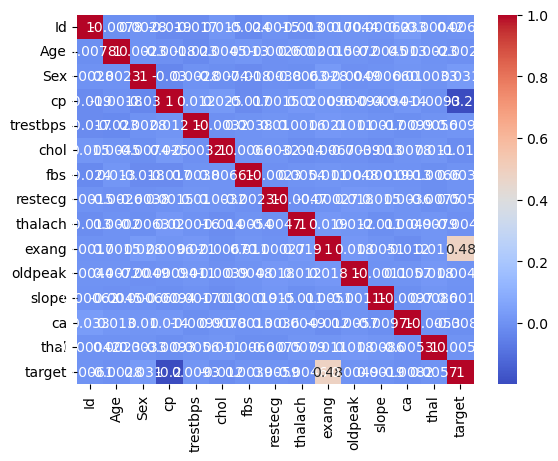

In [17]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [18]:
## Feature engineering
# using Log Transform

In [19]:
train_l["trestbps_log"]=np.log(train_l["trestbps"])


In [20]:
train_l

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_log
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,5.062595
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,5.288267
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,4.615121
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,4.727388
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,4.934474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0,4.672829
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1,4.564348
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1,5.017280
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1,5.273000


In [21]:
test_l["trestbps_log"]=np.log(test_l["trestbps"])


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
test_l["thalach_m"]=scaler.fit_transform(test_l[["thalach"]])
test_l["age_m"]=scaler.fit_transform(test_l[["age"]])

train_l["thalach_m"]=scaler.fit_transform(train_l[["thalach"]])
train_l["Age_m"]=scaler.fit_transform(train_l[["Age"]])



In [24]:
test_lg=test_l.drop(["trestbps","id","age","thalach",],axis=1)
test_lg.columns = test_lg.columns.str.lower()

In [25]:
test_lg

,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,ca,trestbps_log,thalach_m,age_m
0,1,0,495,0,2,1,2.0,1,0,5.093750,0.755725,0.854167
1,1,0,238,0,2,1,4.9,2,2,4.875197,0.022901,0.666667
2,1,0,558,1,1,1,0.7,1,1,4.553877,0.015267,0.500000
3,0,1,287,0,1,1,5.7,1,0,5.181784,0.923664,0.166667
4,0,3,281,0,0,0,1.3,1,4,4.644391,0.389313,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
2692,0,3,291,0,1,0,2.6,2,2,4.912655,0.702290,0.104167
2693,0,1,166,1,2,1,0.3,0,2,4.644391,0.183206,0.895833
2694,1,0,457,1,1,1,3.8,0,3,5.030438,0.755725,0.041667
2695,0,0,242,1,0,1,5.3,0,1,4.709530,0.580153,0.875000


In [26]:
## Dropping Columns before training data

In [27]:
X=train_l.drop(["trestbps","target","thalach","Age","Id",],axis=1)

y=train_l["target"]

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
X_train.columns = X_train.columns.str.lower()
X_test.columns=X_test.columns.str.lower()

In [32]:
lr=LogisticRegression(solver='liblinear', penalty='l1',C=0.012742749857031334)


In [33]:
# Perform K-Fold Cross-Validation
k = 5  # Number of folds
cv_scores = cross_val_score(lr, X_train, y_train, cv=k)


In [34]:
# Display results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.81437126 0.79811805 0.81164384 0.81934932 0.80736301]
Mean CV Score: 0.8102
Standard Deviation of CV Scores: 0.0072


In [35]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.012742749857031334, penalty='l1', solver='liblinear')

In [36]:
y_pred=lr.predict(X_test)

In [37]:
accuracy=accuracy_score(y_pred,y_test)

In [38]:
print("Accuracy",accuracy)

Accuracy 0.8302532511978097


In [39]:
print("Classification_Report:\n",   classification_report(y_pred,y_test))

Classification_Report:
               precision    recall  f1-score   support

           0       0.24      0.55      0.34       114
           1       0.96      0.85      0.90      1347

    accuracy                           0.83      1461
   macro avg       0.60      0.70      0.62      1461
weighted avg       0.90      0.83      0.86      1461



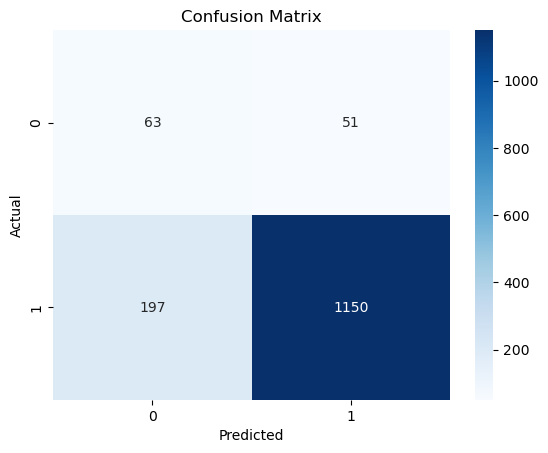

In [40]:
# Confusion matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
## Getting Coefficient_attributes

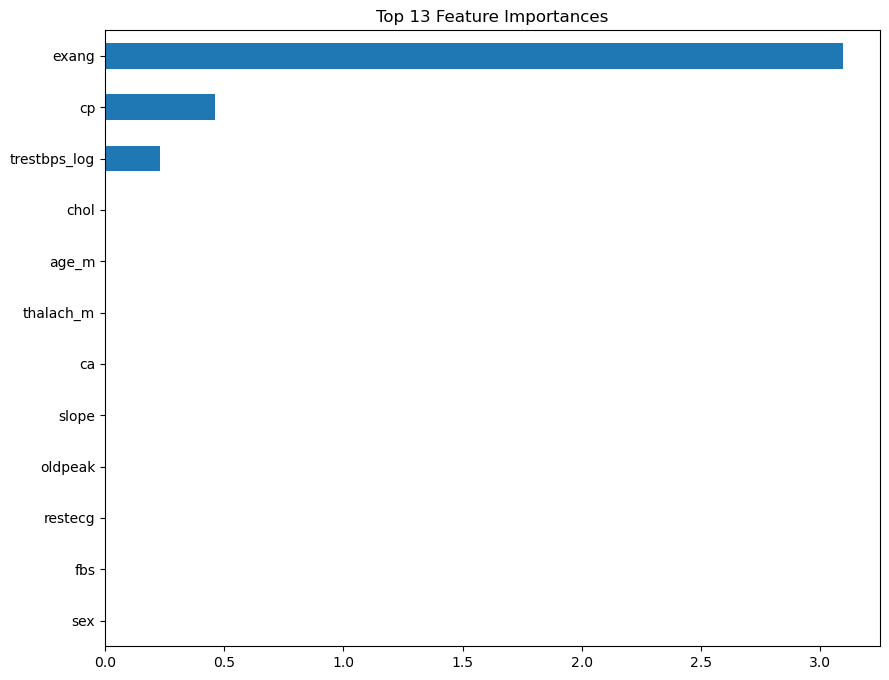

In [51]:
# Get the coefficients from the LogisticRegression model
coefficients_importance = pd.Series(lr.coef_[0], index=X_train.columns)

# Sort the feature importances and select the top 20
top_13_coefficients = coefficients_importance.abs().sort_values(ascending=False).head(20)

# Plot the top 13 feature importances
top_13_coefficients.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 13 Feature Importances')
plt.show()

In [43]:
new_pre=lr.predict(test_lg)

In [44]:
log=Sub_log.copy()

In [45]:
log["new_pre"]=new_pre

In [46]:
log.to_csv("Log_new.csv", index=False)

In [47]:
log.head()

,Id,new_pre
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
